In [109]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [110]:
from floris import tools as wfct
from floris.utilities import wrap_360
from floris_scada_analysis.energy_ratio import energy_ratio
from floris_scada_analysis.dataframe_operations import \
    dataframe_manipulations as dfm
from floris_scada_analysis import floris_tools as fsatools

In [111]:
# Slight mod for jupyter
def load_data():
    # Load dataframe with scada data
    root_dir = os.path.abspath('')
    ftr_path = os.path.join(root_dir, '..', 'demo_dataset',
                            'demo_dataset_60s.ftr')
    if not os.path.exists(ftr_path):
        raise FileNotFoundError('Please run ./examples/demo_dataset/' +
                                'generate_demo_dataset.py before try' +
                                'ing any of the other examples.')
    df = pd.read_feather(ftr_path)
    return df

In [112]:
def load_floris():
    # Initialize the FLORIS interface fi
    print('Initializing the FLORIS object for our demo wind farm')
    file_path = os.path.abspath('')
    fi_path = os.path.join(file_path, "../demo_dataset/demo_floris_input.json")
    fi = wfct.floris_interface.FlorisInterface(fi_path)
    return fi

## Load data and FLORIS

In [113]:
df = load_data()
fi = load_floris()

Initializing the FLORIS object for our demo wind farm


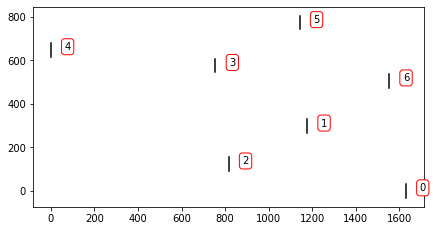

In [114]:
# Visualize layout
fi.vis_layout()

floris.tools.floris_interface.FlorisInterface INFO Default to hub height = 90.0 for horizontal plane.
INFO:floris.tools.floris_interface.FlorisInterface:Default to hub height = 90.0 for horizontal plane.


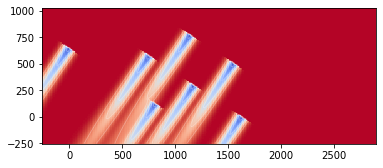

In [115]:
fi.reinitialize_flow_field(wind_direction=34)
fi.calculate_wake()
hor_plane = fi.get_hor_plane()

# Plot and show
fig, ax = plt.subplots()
wfct.visualization.visualize_cut_plane(hor_plane, ax=ax)
plt.show()


In [116]:
## Whats in df
df.head()

,time,pow_000,pow_001,pow_002,pow_003,pow_004,pow_005,pow_006,wd_000,wd_001,...,ws_004,ws_005,ws_006,ti_000,ti_001,ti_002,ti_003,ti_004,ti_005,ti_006
0,2019-01-01 00:00:00-07:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.592835,94.869295,...,1.918876,2.493641,2.176169,0.049863,0.048951,0.055695,0.056672,0.044263,0.060432,0.053408
1,2019-01-01 00:01:00-07:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.697526,83.093903,...,2.350049,2.341677,2.545083,0.052035,0.057396,0.052948,0.053529,0.036994,0.031623,0.036361
2,2019-01-01 00:02:00-07:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.561680,96.272167,...,2.083960,1.847814,1.619196,0.080886,0.094320,0.096976,0.089033,0.107766,0.096707,0.095295
3,2019-01-01 00:03:00-07:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.940131,94.183409,...,1.937004,2.073926,1.940330,0.047145,0.055517,0.058003,0.043416,0.062225,0.063383,0.045742
4,2019-01-01 00:04:00-07:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.572689,103.207270,...,1.980450,1.790088,1.810485,0.063699,0.052407,0.069936,0.059772,0.068112,0.060324,0.058800


In [117]:
# We first need to define a wd against which we plot the energy ratios
# In this example, we set the wind direction to be equal to the mean
# wind direction between all turbines
df = dfm.set_wd_by_all_turbines(df)
df.head()

/Users/pfleming/Desktop/git_tools/floris_scada_analysis/floris_scada_analysis/dataframe_operations/dataframe_manipulations.py:64: RuntimeWarning: Mean of empty slice
  dir_x = np.nanmean(np.cos(array * np.pi / 180.), axis=1)
/Users/pfleming/Desktop/git_tools/floris_scada_analysis/floris_scada_analysis/dataframe_operations/dataframe_manipulations.py:65: RuntimeWarning: Mean of empty slice
  dir_y = np.nanmean(np.sin(array * np.pi / 180.), axis=1)


,time,pow_000,pow_001,pow_002,pow_003,pow_004,pow_005,pow_006,wd_000,wd_001,...,ws_005,ws_006,ti_000,ti_001,ti_002,ti_003,ti_004,ti_005,ti_006,wd
0,2019-01-01 00:00:00-07:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.592835,94.869295,...,2.493641,2.176169,0.049863,0.048951,0.055695,0.056672,0.044263,0.060432,0.053408,92.935237
1,2019-01-01 00:01:00-07:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.697526,83.093903,...,2.341677,2.545083,0.052035,0.057396,0.052948,0.053529,0.036994,0.031623,0.036361,89.375009
2,2019-01-01 00:02:00-07:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.561680,96.272167,...,1.847814,1.619196,0.080886,0.094320,0.096976,0.089033,0.107766,0.096707,0.095295,92.429597
3,2019-01-01 00:03:00-07:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.940131,94.183409,...,2.073926,1.940330,0.047145,0.055517,0.058003,0.043416,0.062225,0.063383,0.045742,93.509794
4,2019-01-01 00:04:00-07:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.572689,103.207270,...,1.790088,1.810485,0.063699,0.052407,0.069936,0.059772,0.068112,0.060324,0.058800,97.490049


In [118]:
# We reduce the dataframe to only data where the wind direction
# is between 20 and 40 degrees.
df = dfm.filter_df_by_wd(df=df, wd_range=[10., 60.])
df = df.reset_index(drop=True)

In [119]:
# We also need to define a reference wind speed and a reference power
# production against to normalize the energy ratios with. In this
# example, we set the wind speed equal to the mean wind speed
# of all upstream turbines. The upstream turbines are automatically
# derived from the turbine layout and the wind direction signal in
# the dataframe, df['wd']. The reference power production is set
# as the average power production of turbines 0 and 6, which are
# always upstream for wind directions between 20 and 90 deg.
df_upstream = fsatools.get_upstream_turbs_floris(fi)
df_upstream.head()

,wd_min,wd_max,turbines
0,0.0,18.7,"[3, 4, 5, 6]"
1,18.7,24.9,"[0, 3, 4, 5, 6]"
2,24.9,29.5,"[0, 1, 3, 4, 5, 6]"
3,29.5,31.6,"[0, 3, 4, 5, 6]"
4,31.6,68.7,"[0, 4, 5, 6]"


In [120]:
df = dfm.set_ws_by_upstream_turbines(df, df_upstream)
df = dfm.set_pow_ref_by_turbines(df, turbine_numbers=[6])
df.tail()

,time,pow_000,pow_001,pow_002,pow_003,pow_004,pow_005,pow_006,wd_000,wd_001,...,ti_000,ti_001,ti_002,ti_003,ti_004,ti_005,ti_006,wd,ws,pow_ref
66844,2020-01-01 09:56:00-07:00,826.478142,1114.682524,648.865079,1011.003701,1177.050886,1116.618278,1107.127195,17.039823,17.790470,...,0.149192,0.132204,0.151362,0.149892,0.127135,0.140801,0.141225,19.071694,6.649278,1107.127195
66845,2020-01-01 09:57:00-07:00,292.295594,371.476714,392.705777,221.890185,399.576627,441.597464,422.360091,24.618449,28.903306,...,0.263517,0.280080,0.266949,0.269317,0.238738,0.242211,0.250620,29.625007,4.708292,422.360091
66846,2020-01-01 09:58:00-07:00,133.273443,94.849434,196.788938,34.397501,203.425032,184.023082,180.113590,32.238850,38.267356,...,0.215263,0.240982,0.178520,0.227032,0.159605,0.162705,0.155544,35.197014,3.866452,180.113590
66847,2020-01-01 09:59:00-07:00,37.964896,14.903701,80.736038,31.361143,83.019676,81.680454,72.153512,43.241129,43.406180,...,0.148965,0.177196,0.114878,0.186377,0.110408,0.091577,0.134161,44.940290,3.194551,72.153512
66848,2020-01-01 10:01:00-07:00,14.066808,31.154213,35.208409,6.643319,42.281270,42.392581,41.725358,23.411962,24.124522,...,0.248765,0.245743,0.217667,0.256251,0.190398,0.178398,0.167732,29.105235,2.570325,41.725358


In [124]:
# # Initialize energy ratio object for the dataframe
era = energy_ratio.energy_ratio(df_in=df, verbose=True)

Calculating energy ratios with N = 1.


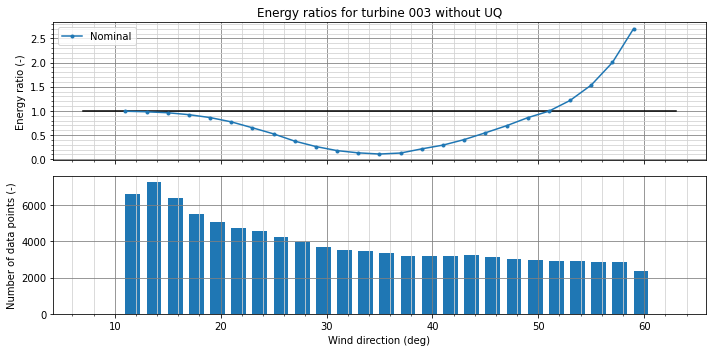

In [127]:
# Get energy ratio without uncertainty quantification
tt = 3
era.get_energy_ratio(
    test_turbines=[tt],
    wd_step=2.0,
    ws_step=1.0,
    wd_bin_width=3.0,
)
fig, ax = era.plot_energy_ratio()
ax[0].set_title("Energy ratios for turbine %03d without UQ" % tt)
plt.tight_layout()

## Prototype the function

In [122]:
def table_analysis(df_list, name_list, t_list, wd_bins, ws_bins, filename):
    
    # If t_list is none put in all possible turbines
    # TODO
    
    # Save the basename
    basename = name_list[0]
    
    # Sticth the dataframes together
    df_full = pd.DataFrame()
    for dfx, namex in zip(df_list, name_list):
        df_temp = dfx.copy()
        df_temp['name'] = namex
        df_full = df_full.append(df_temp)
        
    
    
    # Cut wd and ws into bins
    df_full['wd_bin'] = pd.cut(df_full.wd,wd_bins)
    df_full['ws_bin'] = pd.cut(df_full.ws,ws_bins)
    
    # Drop out of range
    df_full = df_full.dropna(subset=['wd_bin','ws_bin'])
    
    # Sort by bins
    df_full = df_full.sort_values(['name','wd_bin','ws_bin'])
    
    # Add a bin count column
    df_full['bin_count'] = 1
    
    # Convert all to sums and means
    df_group = df_full.groupby(['wd_bin','ws_bin','name']).agg([np.sum,np.mean])
#     print(df_group.columns)
    
    # Flatten the columns
    df_group.columns = ["_".join(c) for c in df_group.columns]
    
    # Spin the name out to the columns
    df_group = df_group.unstack()
    
    # Flatten the columns
    df_group.columns = ["_".join(c) for c in df_group.columns]
    
    # Round the numerical columns to one decimal place
    df_group = df_group.round(1)
    
    # Reset the index
    df_group = df_group.reset_index()
    
    # Put together the final table
    df_table = df_group[['wd_bin','ws_bin']].copy()
    
    # Add the bin counts, mean wind speeds, and reference power
    for n in name_list:
        df_table['bin_count_sum_%s' % n] = df_group['bin_count_sum_%s' % n]
    for n in name_list:
        df_table['ws_mean_%s' % n] = df_group['ws_mean_%s' % n]
#     for n in name_list:
#         df_table['ti_mean_%s' % n] = df_group['ti_mean_%s' % n]
    for n in name_list:
        df_table['ref_energy_%s' % n] = df_group['pow_ref_sum_%s' % n]
    
    # Add an empty column
    df_table['___'] = None
    
    # Add the rest via turbine
    for t in t_list:
        for n in name_list:

            # Add the energy
            df_table['energy_%03d_%s' % (t,n)] = df_group['pow_%03d_sum_%s' % (t,n)]
            
            # Add the energy ratio
            df_table['er_%03d_%s' % (t,n)] = np.round(df_table['energy_%03d_%s' % (t,n)] / df_table['ref_energy_%s' % n],3)
    
            # Only do this if not first
            if not n == name_list[0]:
                # Add the change in energy ratio from baseline (whichever name is first)
                df_table['er_change_%03d_%s' % (t,n)] = np.round(1 * (df_table['er_%03d_%s' % (t,n)] - df_table['er_%03d_%s' % (t,basename)]) / df_table['er_%03d_%s' % (t,basename)],3) 
    
        # Add an empty column
        df_table['___%d' % t] = None
    
    # Add the totals by direction
    # print(df_table.head())
    df_table_final = pd.DataFrame()
    for wd_bin in df_table.wd_bin.unique():
        df_sub_pre = df_table[df_table.wd_bin == wd_bin]
        
        # Make a new df which is a sum of the other
        df_sub = df_sub_pre.append(df_sub_pre.sum(numeric_only=True), ignore_index=True)#.to_frame()
        
        # Go through the columns of this frame and fix the last row
        last_row = df_sub.shape[0] -1
        
        # Fix ws and wd
        df_sub.loc[last_row,'wd_bin'] = df_sub.loc[last_row-1,'wd_bin']
        df_sub['ws_bin'] = df_sub['ws_bin'].astype(str)
        df_sub.loc[last_row,'ws_bin'] = 'TOTALS'
        
        # Correct ws to be a mean
        for n in name_list:
             df_sub.loc[last_row,'ws_mean_%s' % n] = np.round(np.sum(df_sub_pre['bin_count_sum_%s' % n] * df_sub_pre['ws_mean_%s' % n]) / df_sub_pre['bin_count_sum_%s' % n].sum(),1)
        
        
        # Correct the energy ratios
        for t in t_list:
            for n in name_list:
                
                # Recompute the energy ratio (overwrite the sum)
                df_sub['er_%03d_%s' % (t,n)] = np.round(df_sub['energy_%03d_%s' % (t,n)] / df_sub['ref_energy_%s' % n],3)
                # df_sub.loc[last_row,'er_%03d_%s' % (t,n)] = df_sub.loc[last_row,'energy_%03d_%s' % (t,n)] / df_sub.loc[last_row,'ref_energy_%s' % n]
        
                # Only do this if not first
                if not n == name_list[0]:
                    # Recompute the change in energy ratio (overwrite the sum)
                    df_sub['er_change_%03d_%s' % (t,n)] = np.round(1 * (df_sub['er_%03d_%s' % (t,n)] - df_sub['er_%03d_%s' % (t,basename)]) / df_sub['er_%03d_%s' % (t,basename)],3) 
        
        # Add an empty row
        df_sub = df_sub.append(pd.DataFrame([[''] * len(df_sub.columns)], columns=df_sub.columns))
        
        # Append to the final
        df_table_final = df_table_final.append(df_sub)
        
    
    # Write out the dataframe
    writer = pd.ExcelWriter(filename, engine='xlsxwriter')
    df_table_final.to_excel(writer , index=False, sheet_name= 'results')
    workbook = writer.book
    worksheet = writer.sheets['results']
    
    # Set some formatting
    
    # Make change into a percentage
    # Adding percentage format.
    fmt_rate = workbook.add_format({
     "num_format" : '%0.0' , "bold" : False
    })
    cols = df_table_final.columns
    change_list = [i for i in range(len(cols)) if 'change' in cols[i]]
    for c in change_list:
        worksheet.set_column(c,c,10,fmt_rate)
        
    # Make the seperator columns very narrow and black
    fmt_black = workbook.add_format({
     "fg_color" : '#000000'
    })
    change_list = [i for i in range(len(cols)) if '___' in cols[i]]
    for c in change_list:
        worksheet.set_column(c,c,1,fmt_black)
        
    # Add data bars to the bins counts
    change_list = [i for i in range(len(cols)) if 'count' in cols[i]]
    for c in change_list:
        worksheet.conditional_format(0,c,df_table_final.shape[0],c, {'type': 'data_bar','max_value':100})
        
    # Add color to the change columns
    change_list = [i for i in range(len(cols)) if 'change' in cols[i]]
    for c in change_list:
        worksheet.conditional_format(0,c,df_table_final.shape[0],c, {'type': 'data_bar','bar_axis_position': 'middle','bar_negative_border_color_same': True})
    
    # Add color to energy ratios
    change_list = [i for i in range(len(cols)) if ('er_' in cols[i]) and not ('change' in cols[i])]
    for c in change_list:
        worksheet.conditional_format(0,c,df_table_final.shape[0],c, {'type': '3_color_scale',
                                                                     'min_value': 0.25,
                                                                     'min_type':'num',
                                                                     'max_value': 1.5,
                                                                     'max_type':'num'})
    
    
    # Header
    # Adding formats for header row.
    fmt_header = workbook.add_format({
     'bold': True,
     'text_wrap': True,
     'valign': 'top',
     'fg_color': '#5DADE2',
     'font_color': '#FFFFFF',
     'border': 1})
    for col , value in enumerate(df_table_final.columns.values):
         worksheet.write(0, col, value, fmt_header)
    
    writer.save()
    

# 1 df example    
# table_analysis([df],['base'],[3,5], wd_bins = [30,32,34], ws_bins = np.arange(5,10,1), filename='test_file.xlsx')

# 2 df example (as in energy ratio example)
df2 = df.copy()
df2['wd'] = wrap_360(df2['wd'] + 1.5)
table_analysis([df, df2],['base','con'],[3,5], wd_bins = np.arange(10,60,1), ws_bins = np.arange(5,11,1), filename='test_file_2.xlsx')

/var/folders/zl/d69s6z796rs4fw08fnxrl0qxydms74/T/ipykernel_56110/2303574048.py:103: RuntimeWarning: invalid value encountered in double_scalars
  df_sub.loc[last_row,'ws_mean_%s' % n] = np.round(np.sum(df_sub_pre['bin_count_sum_%s' % n] * df_sub_pre['ws_mean_%s' % n]) / df_sub_pre['bin_count_sum_%s' % n].sum(),1)
